In [1]:
import numpy as np
import pandas as pd
import scipy.io.wavfile as wav
from python_speech_features import mfcc
from tempfile import TemporaryFile
import os
import math
import pickle
import random
import operator

In [2]:
def distance(instance1, instance2, k):
    distance = 0
    mm1 = instance1[0]
    cm1 = instance1[1]
    mm2 = instance2[0]
    cm2 = instance2[1]
    distance = np.trace(np.dot(np.linalg.inv(cm2), cm1))
    distance += (np.dot(np.dot((mm2-mm1).transpose(), np.linalg.inv(cm2)), mm2-mm1))
    distance += np.log(np.linalg.det(cm2)) - np.log(np.linalg.det(cm1))
    distance -= k
    return distance

In [3]:
#define a function to get distance between feature vectors and find neighbors
def getNeighbors(trainingset, instance, k):
    distances = []
    for x in range(len(trainingset)):
        dist = distance(trainingset[x], instance, k) + distance(instance,trainingset[x],k)
        distances.append((trainingset[x][2], dist))
    distances.sort(key=operator.itemgetter(1))
    neighbors = []
    for x in range(k):
        neighbors.append(distances[x][0])
    return neighbors

In [4]:
#function to identify the nearest neighbors
def nearestclass(neighbors):
    classVote = {}
    
    for x in range(len(neighbors)):
        response = neighbors[x]
        if response in classVote:
            classVote[response] += 1
        else:
            classVote[response] = 1
            
    sorter = sorted(classVote.items(), key=operator.itemgetter(1), reverse=True)
    return sorter[0][0]

In [5]:
# define a function that will evaluate a model
def getAccuracy(testSet, prediction):
    correct = 0
    for x in range(len(testSet)):
        if testSet[x][-1] == prediction[x]:
            correct += 1
    return 1.0 * correct / len(testSet)

In [6]:
pip install --upgrade librosa


Note: you may need to restart the kernel to use updated packages.


In [7]:
import librosa, IPython
import librosa.display
file ="C:\\Users\\Asus\\Downloads\\oi\\Data\\genres_original\\rock\\rock.00084.wav"
signal, sr = librosa.load(file , sr = 22050) 
IPython.display.Audio(signal, rate=sr)

In [8]:


directory = "C:\\Users\\Asus\\Downloads\\oi\\Data\\genres_original"
f = open("my.dat", "wb")
i = 0
for folder in os.listdir(directory):
    #print(folder)
    i += 1
    if i == 11:
        break
    for file in os.listdir(directory+"/"+folder):
        #print(file)
        try:
            (rate, sig) = wav.read(directory+"/"+folder+"/"+file)
            mfcc_feat = mfcc(sig, rate, winlen = 0.020, appendEnergy=False)
            covariance = np.cov(np.matrix.transpose(mfcc_feat))
            mean_matrix = mfcc_feat.mean(0)
            feature = (mean_matrix, covariance, i)
            pickle.dump(feature, f)
        except Exception as e:
            print("Got an exception: ", e, 'in folder: ', folder, ' filename: ', file)
f.close()


Got an exception:  File format b'\xcb\x15\x1e\x16' not understood. Only 'RIFF' and 'RIFX' supported. in folder:  jazz  filename:  jazz.00054.wav


In [9]:
def weighted_neighbors(neighbors):
    weights = {}
    for response, dist in neighbors:
        weights[response] = weights.get(response, 0) + 1 / (dist + 1e-5)
    return max(weights.items(), key=operator.itemgetter(1))[0]


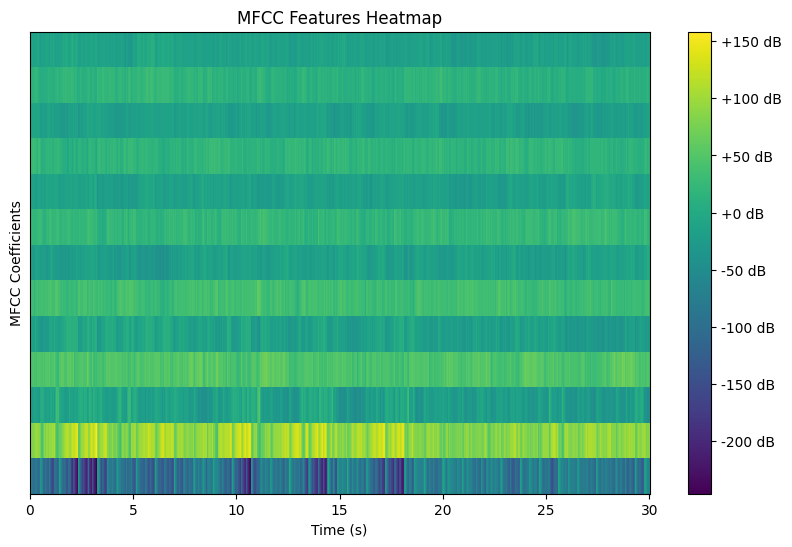

In [10]:
import librosa
import librosa.display
import matplotlib.pyplot as plt

# Load the sample audio file
file = "C:\\Users\\Asus\\Downloads\\oi\\Data\\genres_original\\rock\\rock.00084.wav"
signal, sr = librosa.load(file, sr=22050)
mfcc_features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)

# Plot MFCC
plt.figure(figsize=(10, 6))
librosa.display.specshow(mfcc_features, x_axis='time', sr=sr, cmap='viridis')
plt.colorbar(format='%+2.0f dB')
plt.title('MFCC Features Heatmap')
plt.xlabel('Time (s)')
plt.ylabel('MFCC Coefficients')
plt.show()


Processing genre: blues
Processing genre: classical
Processing genre: country
Processing genre: disco
Processing genre: hiphop
Processing genre: jazz


C:\Users\Asus\AppData\Local\Temp\ipykernel_13560\576279345.py:14: UserWarning: PySoundFile failed. Trying audioread instead.
  signal, sr = librosa.load(file_path, sr=sr)
C:\Users\Asus\anaconda3\Lib\site-packages\librosa\core\audio.py:184: FutureWarning: librosa.core.audio.__audioread_load
	Deprecated as of librosa version 0.10.0.
	It will be removed in librosa version 1.0.
  y, sr_native = __audioread_load(path, offset, duration, dtype)


Error processing C:\Users\Asus\Downloads\oi\Data\genres_original\jazz\jazz.00054.wav: 
Processing genre: metal
Processing genre: pop
Processing genre: reggae
Processing genre: rock


C:\Users\Asus\anaconda3\Lib\site-packages\seaborn\_oldcore.py:1765: FutureWarning: unique with argument that is not not a Series, Index, ExtensionArray, or np.ndarray is deprecated and will raise in a future version.
  order = pd.unique(vector)


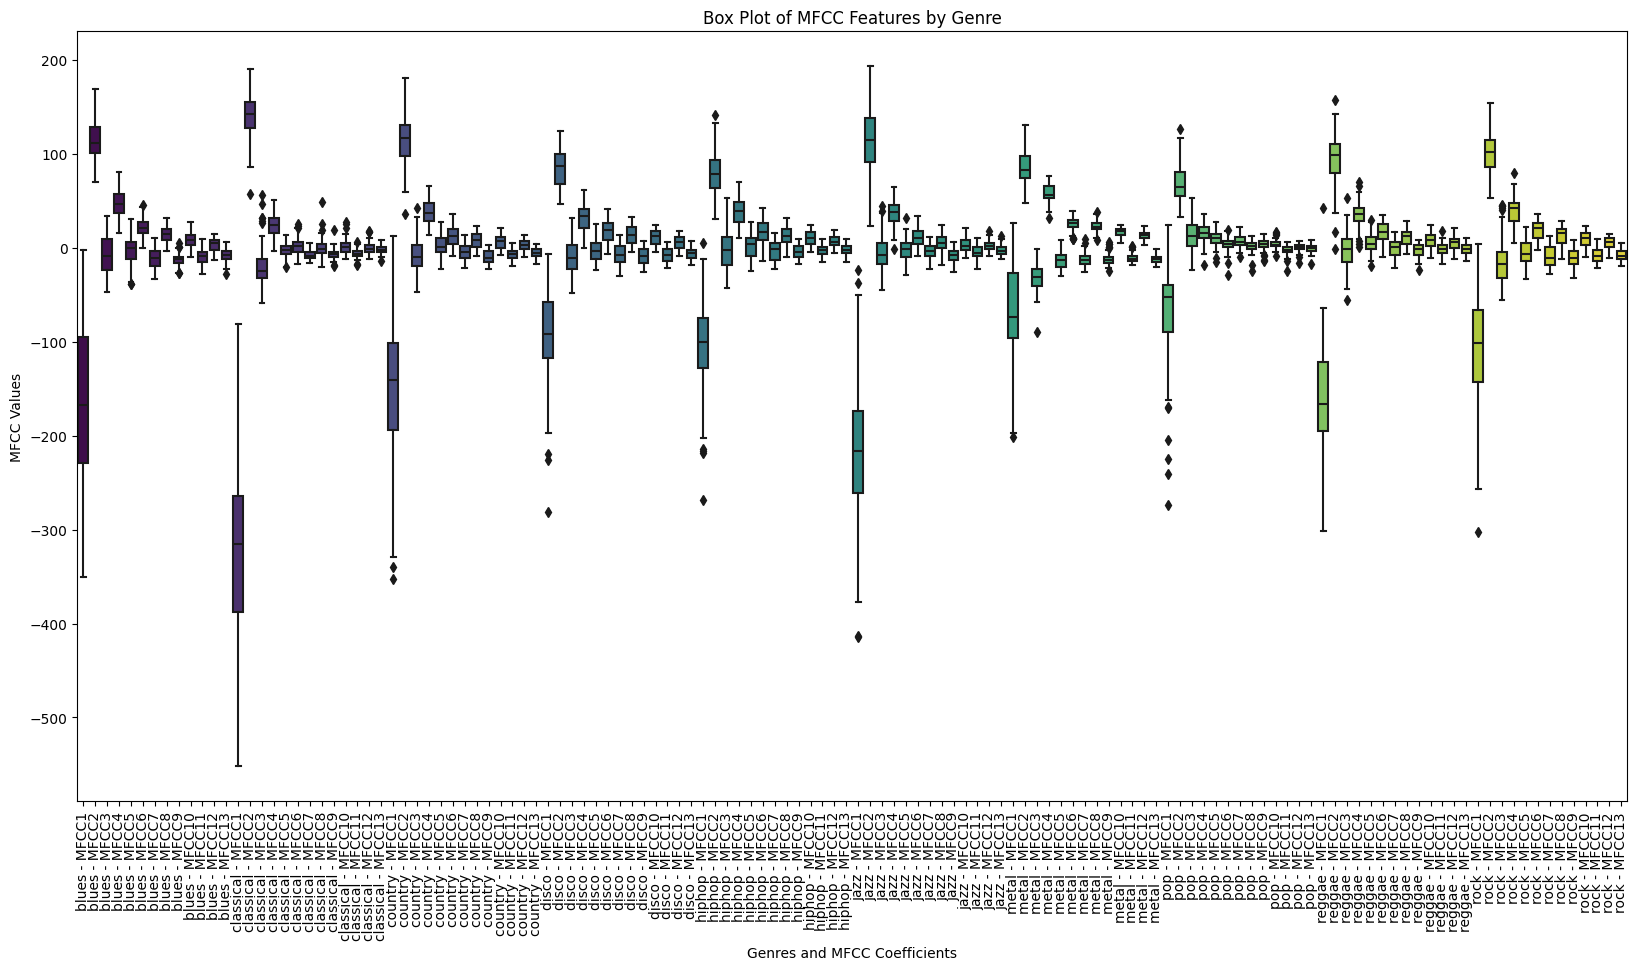

In [11]:

import os
import librosa
import librosa.display
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Function to load audio and extract MFCC
def extract_mfcc(file_path, sr=22050, n_mfcc=13):
    """
    Load an audio file and compute its MFCC features.
    """
    try:
        signal, sr = librosa.load(file_path, sr=sr)
        mfcc_features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=n_mfcc)
        return mfcc_features
    except Exception as e:
        print(f"Error processing {file_path}: {e}")
        return None

# Function to visualize MFCC heatmap
def plot_mfcc_heatmap(mfcc_features, sr, title="MFCC Heatmap"):
    """
    Plot a heatmap for MFCC features.
    """
    plt.figure(figsize=(10, 6))
    librosa.display.specshow(mfcc_features, x_axis='time', sr=sr, cmap='viridis')
    plt.colorbar(format='%+2.0f dB')
    plt.title(title)
    plt.xlabel('Time (s)')
    plt.ylabel('MFCC Coefficients')
    plt.show()

# Base directory for audio dataset
base_path = "C:\\Users\\Asus\\Downloads\\oi\\Data\\genres_original"

# Dictionary to store aggregated MFCC data for each genre
mfcc_data = {}

# Iterate through genres and files
for genre in os.listdir(base_path):
    genre_path = os.path.join(base_path, genre)
    if os.path.isdir(genre_path):  # Check if it's a directory
        genre_mfccs = []  # To store mean MFCC values for all files in this genre
        print(f"Processing genre: {genre}")
        
        for file in os.listdir(genre_path):
            if file.endswith(".wav"):  # Only process .wav files
                file_path = os.path.join(genre_path, file)
                
                # Extract MFCC features
                mfcc_features = extract_mfcc(file_path)
                if mfcc_features is not None:
                    # Compute mean MFCC values across time
                    mean_mfcc = np.mean(mfcc_features, axis=1)
                    genre_mfccs.append(mean_mfcc)
                    
                    # Uncomment below to visualize heatmaps for individual files
                    # plot_mfcc_heatmap(mfcc_features, sr=22050, title=f"MFCC Heatmap for {genre} - {file}")
        
        # Save aggregated MFCC data for this genre
        if genre_mfccs:
            mfcc_data[genre] = np.array(genre_mfccs)

# Plot boxplot for MFCC features across genres
def plot_mfcc_boxplot(mfcc_data):
    """
    Plot a boxplot for MFCC features across genres.
    """
    boxplot_data = []
    labels = []
    
    for genre, mfcc_values in mfcc_data.items():
        for coeff_idx in range(mfcc_values.shape[1]):  # Loop through all 13 MFCC coefficients
            boxplot_data.extend(mfcc_values[:, coeff_idx])  # Add all values for this coefficient
            labels.extend([f"{genre} - MFCC{coeff_idx+1}"] * mfcc_values.shape[0])
    
    # Create the boxplot
    plt.figure(figsize=(20, 10))
    sns.boxplot(x=labels, y=boxplot_data, palette="viridis")
    plt.xticks(rotation=90)
    plt.title('Box Plot of MFCC Features by Genre')
    plt.xlabel('Genres and MFCC Coefficients')
    plt.ylabel('MFCC Values')
    plt.show()

# Plot the boxplot for all genres
plot_mfcc_boxplot(mfcc_data)



In [38]:
#split dataset into train and test set
dataset = []

def loadDataset(filename, split, trset, teset):
    with open('my.dat','rb') as f:
        while True:
            try:
                dataset.append(pickle.load(f))
            except EOFError:
                f.close()
                break
    for x in range(len(dataset)):
        if random.random() < split:
            trset.append(dataset[x])
        else:
            teset.append(dataset[x])

trainingSet = []
testSet = []
loadDataset('my.dat', 0.66, trainingSet, testSet)

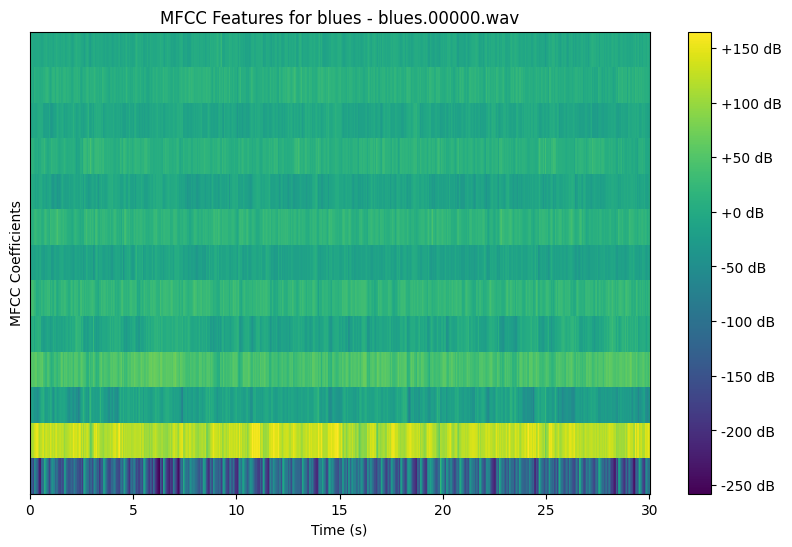

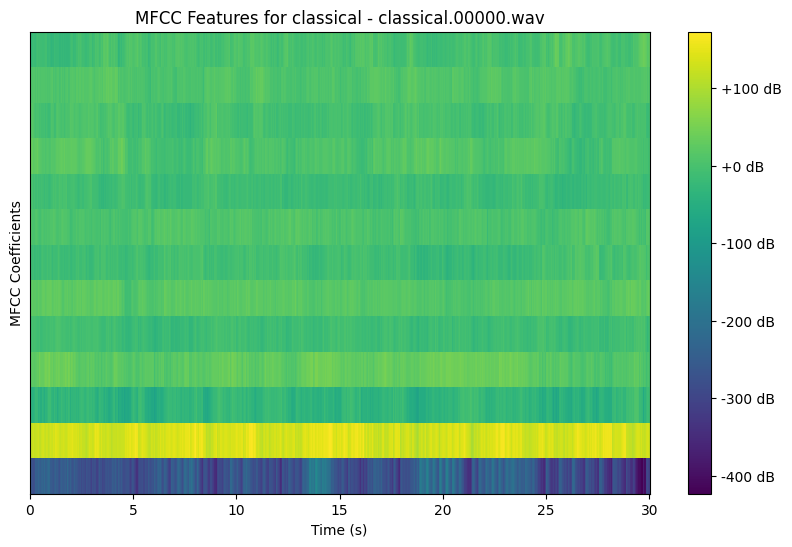

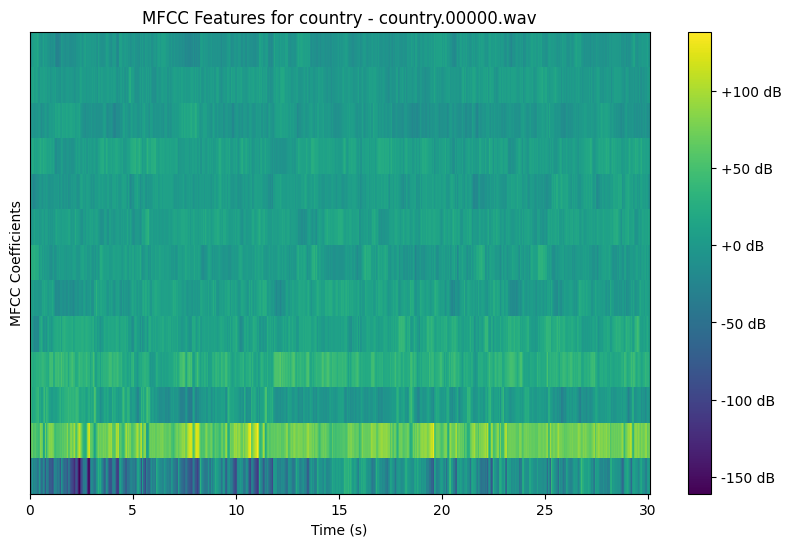

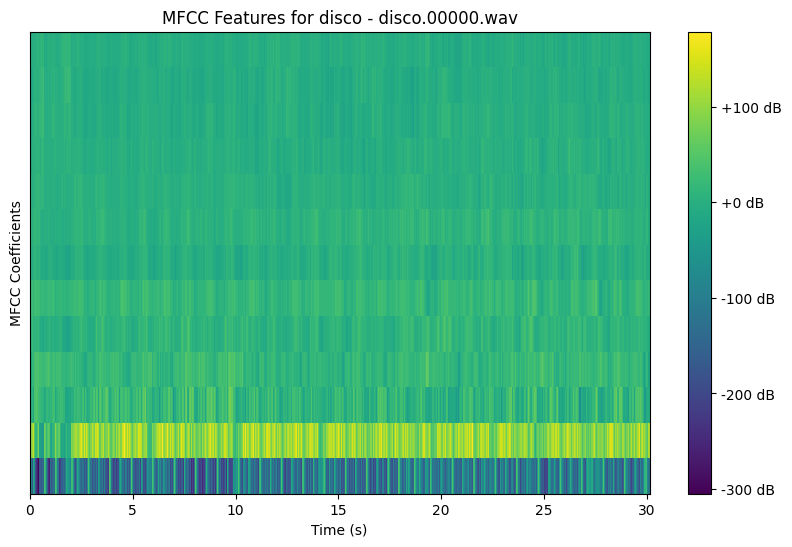

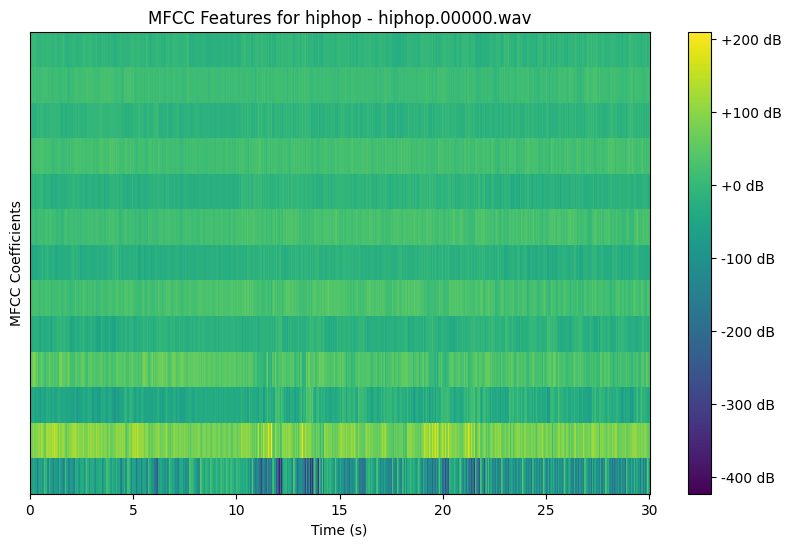

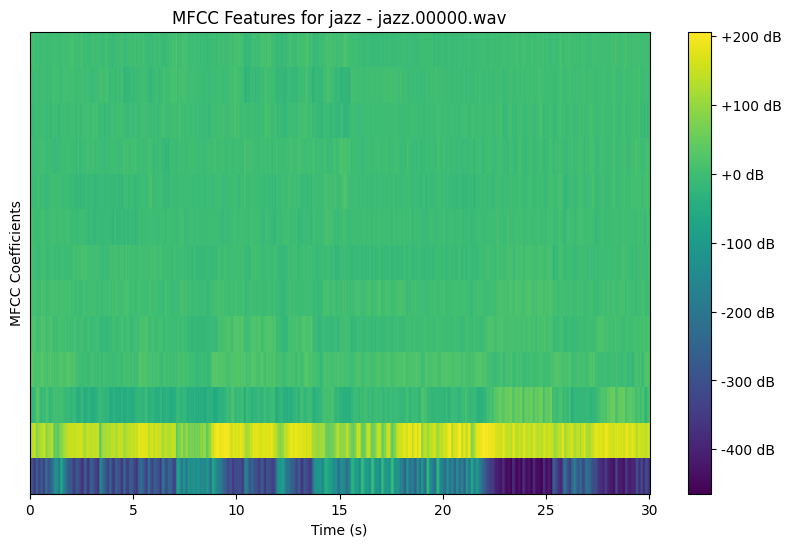

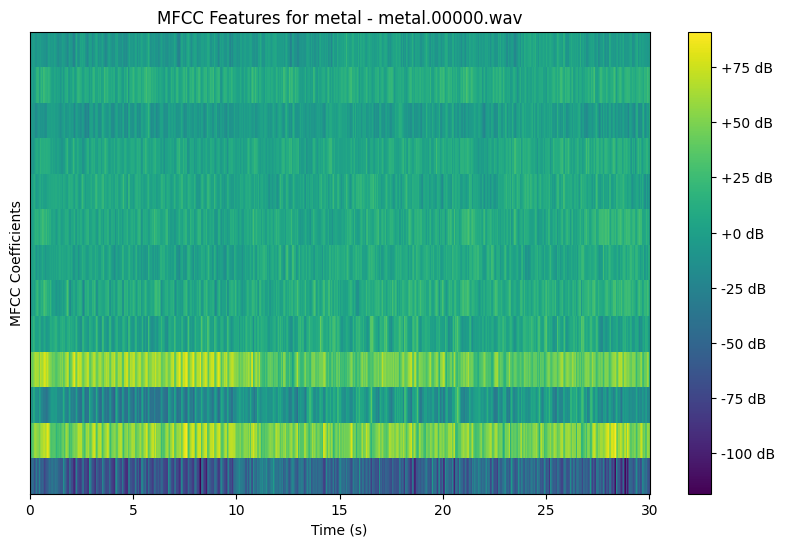

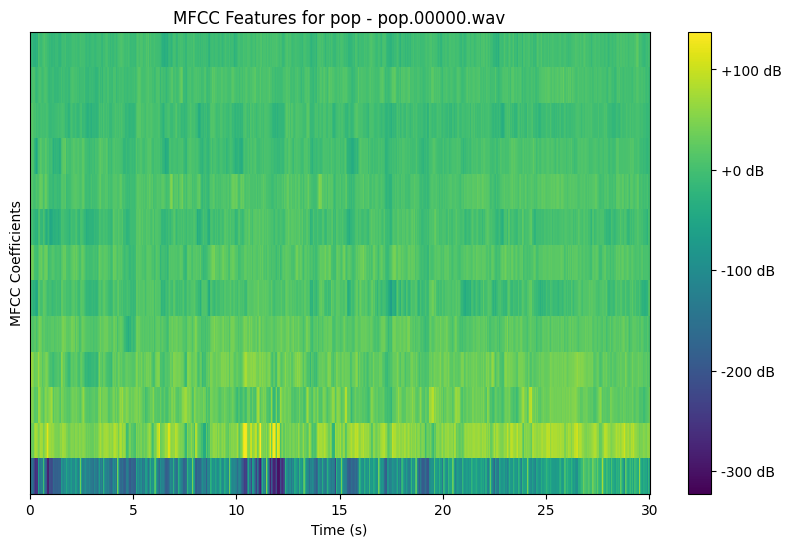

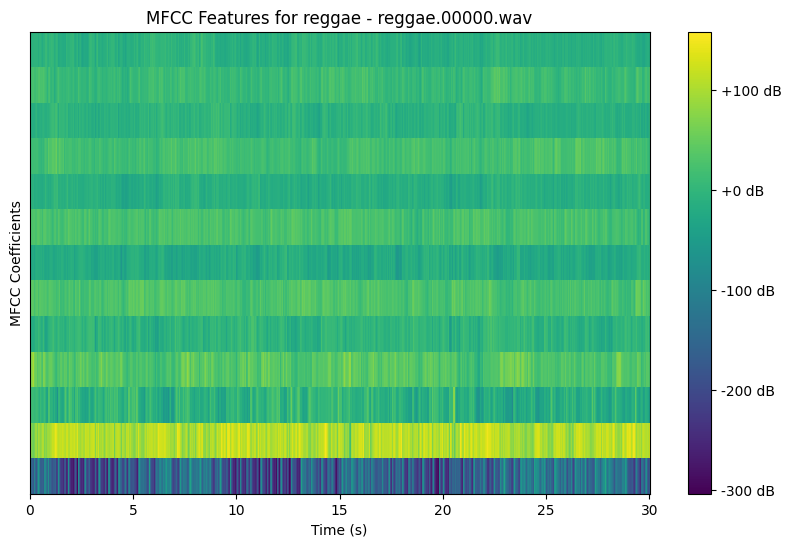

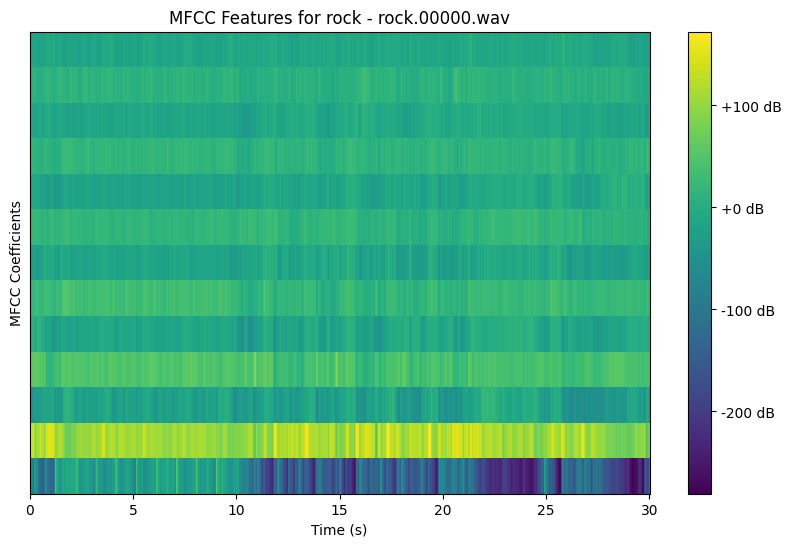

In [49]:
import librosa
import librosa.display
import matplotlib.pyplot as plt
import os

# Path to the dataset directory
base_path = "C:\\Users\\Asus\\Downloads\\oi\\Data\\genres_original"

# Iterate through all genre folders
for genre in os.listdir(base_path):
    genre_path = os.path.join(base_path, genre)
    if os.path.isdir(genre_path):  # Ensure it's a folder
        # Select the first file from each genre (or iterate over all files if needed)
        for file in os.listdir(genre_path):
            if file.endswith('.wav'):  # Ensure it's a .wav file
                file_path = os.path.join(genre_path, file)
                
                # Load the audio file
                signal, sr = librosa.load(file_path, sr=22050)
                
                # Extract MFCC features
                mfcc_features = librosa.feature.mfcc(y=signal, sr=sr, n_mfcc=13)
                
                # Plot the MFCC
                plt.figure(figsize=(10, 6))
                librosa.display.specshow(mfcc_features, x_axis='time', sr=sr, cmap='viridis')
                plt.colorbar(format='%+2.0f dB')
                plt.title(f'MFCC Features for {genre} - {file}')
                plt.xlabel('Time (s)')
                plt.ylabel('MFCC Coefficients')
                plt.show()
                
                # Break after plotting one example per class
                break


In [40]:
# For Jupyter Notebooks, use this line to enable inline plotting
%matplotlib inline


In [42]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
for i in range(len(dataset)):
    mean_matrix, covariance, label = dataset[i]
    scaled_mean = scaler.fit_transform(mean_matrix.reshape(-1, 1)).flatten()
    dataset[i] = (scaled_mean, covariance, label)


In [44]:
from sklearn.model_selection import train_test_split

train, test = train_test_split(dataset, test_size=0.33, stratify=[x[2] for x in dataset])


In [46]:
# Make the prediction using KNN(K nearest Neighbors)
length = len(testSet)
predictions = []
for x in range(length):
    predictions.append(nearestclass(getNeighbors(trainingSet, testSet[x], 5)))

accuracy1 = getAccuracy(testSet, predictions)
print(accuracy1)

0.7120743034055728


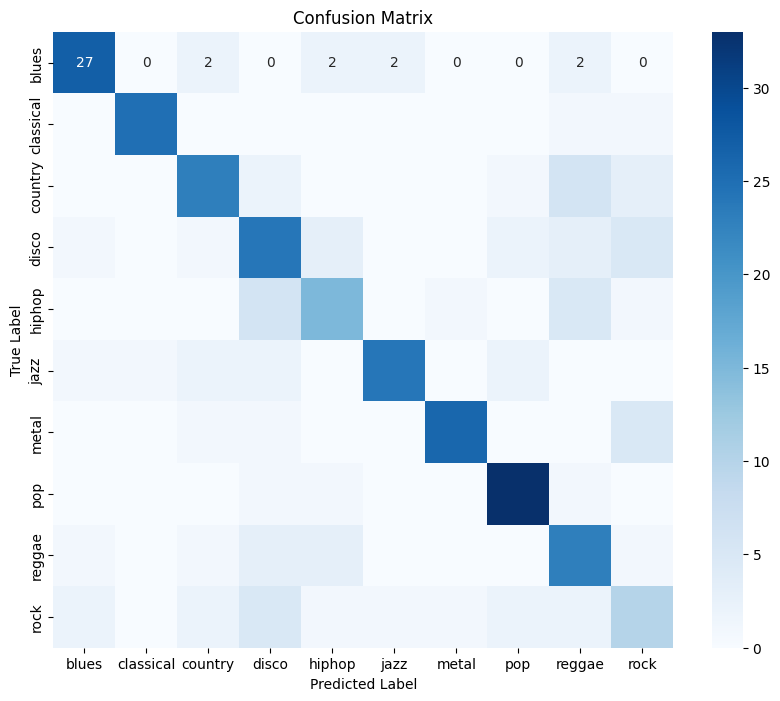

              precision    recall  f1-score   support

       blues       0.84      0.77      0.81        35
   classical       0.96      0.93      0.94        27
     country       0.72      0.66      0.69        35
       disco       0.55      0.62      0.58        39
      hiphop       0.60      0.54      0.57        28
        jazz       0.89      0.75      0.81        32
       metal       0.93      0.79      0.85        33
         pop       0.82      0.92      0.87        36
      reggae       0.53      0.72      0.61        32
        rock       0.38      0.38      0.38        26

    accuracy                           0.71       323
   macro avg       0.72      0.71      0.71       323
weighted avg       0.73      0.71      0.72       323



In [54]:
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.metrics import confusion_matrix, classification_report

# Assuming these variables are already available:
# `testSet`: the list of test samples (features + true labels)
# `predictions`: the list of predicted labels for the test samples

# Extract the true labels from the test set
true_labels = [sample[-1] for sample in testSet]  # Assuming the last element is the label

# Generate the confusion matrix
cm = confusion_matrix(true_labels, predictions)

# Create a heatmap for the confusion matrix
plt.figure(figsize=(10, 8))
sns.heatmap(cm, annot=True, fmt='d', cmap='Blues', xticklabels=results.values(), yticklabels=results.values())
plt.xlabel('Predicted Label')
plt.ylabel('True Label')
plt.title('Confusion Matrix')
plt.show()

# Print a detailed classification report
print(classification_report(true_labels, predictions, target_names=list(results.values())))


In [47]:
from collections import defaultdict
results = defaultdict(int)

directory ="C:\\Users\\Asus\\Downloads\\oi\\Data\\genres_original" 

i = 1
for folder in os.listdir(directory):
    results[i] = folder
    i += 1

In [48]:
pred = nearestclass(getNeighbors(dataset, feature, 5))
print(results[pred])

classical
